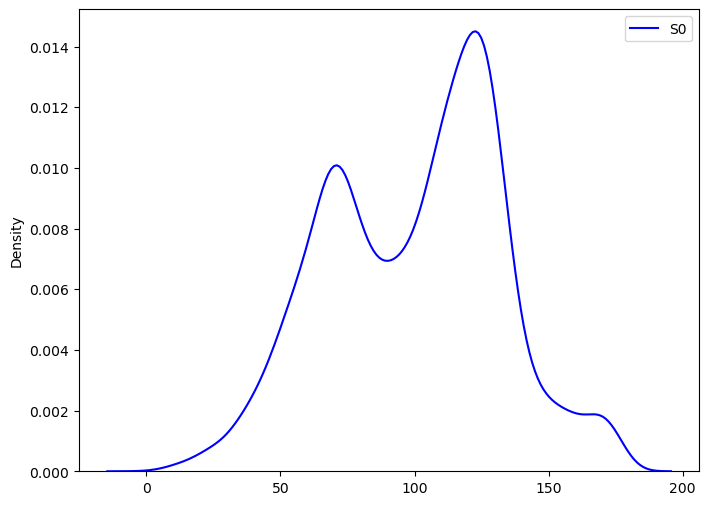

In [2]:
import MDAnalysis as mda
import numpy as np
from MDAnalysis.analysis.distances import distance_array
import matplotlib.pyplot as plt
import seaborn as sns

TPR = 'md_0_sim_resp_24trp-1ta_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-1ta_500ns_pbc_center.xtc'

u = mda.Universe(TPR, XTC)

donors = u.select_atoms("name O4 O6 O8 O10 O11 O16 O44 O55 O43 O67 O99 O98 O111 O19 O49 O60 O48 O71 O101 O102 O114 O26 O59 O68 O58 O80 O112 O113 O116 O20 O39 O72 O74 O84 O94 O121 O122 O12 O22 O54 O64 O53 O76 O103 O104 O115")
acceptors = u.select_atoms("name N1 N2 O1 O2") 

angles = []
distances = []
for ts in u.trajectory[5000:10000:10]: 
    for donor in donors:
        H = donor
        D = H.bonded_atoms[0]
        for A in acceptors:
            dist = np.linalg.norm((D.position - A.position))
            # dist = distance_array(D.position, A.position, box=u.dimensions)[0]
            if dist <= 4.0:  # typical H-bond cutoff
                vec_DH = H.position - D.position
                vec_HA = A.position - H.position
                # distances= distance_array(D.position, A.position, box=u.dimensions)
                angle = np.degrees(
                    np.arccos(np.dot(vec_DH, vec_HA) /
                              (np.linalg.norm(vec_DH) * np.linalg.norm(vec_HA))))
                angles.append(angle)
                # if angle > 0:  # angle cutoff for H-bond
                    # print(f"Frame {ts.frame}: D-A = {dist:.2f} Å, ∠DHA = {angle:.2f}°")
                    
                    
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(distances, color='red', label='D-A', ax=ax)
sns.kdeplot(angles, color='blue', label='S0', ax=ax)
ax.legend()                    
                    

In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from MDAnalysis.analysis.distances import distance_array


TPR = 'md_0_sim_resp_24trp-1ta_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-1ta_500ns_pbc_center.xtc'
u = mda.Universe(TPR, XTC)

# donors = u.select_atoms("name O4 O6 O8 O10 O11 O16 O44 O55 O43 O67 O99 O98 O111 O19 O49 O60 O48 O71 O101 O102 O114 O26 O59 O68 O58 O80 O112 O113 O116 O20 O39 O72 O74 O84 O94 O121 O122 O12 O22 O54 O64 O53 O76 O103 O104 O115")
# acceptors = u.select_atoms("name N1 N2 O1 O2")

acceptors = u.select_atoms("name O4 O6 O8 O10 O11 O16 O44 O55 O43 O67 O99 O98 O111 O19 O49 O60 O48 O71 O101 O102 O114 O26 O59 O68 O58 O80 O112 O113 O116 O20 O39 O72 O74 O84 O94 O121 O122 O12 O22 O54 O64 O53 O76 O103 O104 O115")
donors = u.select_atoms("name N1 N2 O1 O2")

angles = []
distances = []
for ts in u.trajectory[5000:10000:100]: 
    for donor in donors:
        if len(donor.bonded_atoms) == 0:
            continue
        H = donor
        D = H.bonded_atoms[0] 
        for A in acceptors:
            # Calculate D-A distance
            dist = np.linalg.norm(D.position - A.position)
            if dist <= 3.5:
                vec_DH = H.position - D.position
                vec_HA = A.position - H.position
                angle = np.degrees(
                    np.arccos(
                        np.dot(vec_DH, vec_HA) /
                        (np.linalg.norm(vec_DH) * np.linalg.norm(vec_HA))
                    )
                )
                angles.append(angle)
                distances.append(dist)

# Plot results
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(distances, color='red', label='D-A Distance (Å)', ax=ax)
# sns.kdeplot(angles, color='blue', label='∠D-H-A Angle (°)', ax=ax)
ax.set_xlabel('Value')
ax.set_ylabel('Density')
plt.axvline(3.78)
# plt.axvline(120)

ax.legend()
plt.tight_layout()
plt.show()
